---
format:
    html:
        embed-resources: true
---

# Lab-3.2: EDA and distance metrics

**Instructions**

Read and work through all tutorial content and do all exercises below using python

**Submission**:

* You need to upload ONE document to Canvas when you are done
  * A PDF (or HTML) of the completed `.ipynb` document (python submission)
* The final uploaded version should NOT have any code-errors present
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc

`You CAN use code from lab demonstrations, when appropriate`

## Setup

In [8]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Part-1: Iris Data

We will start with some very "clean" and pristine data, i.e. the iris dataset.

The Iris dataset is a classic dataset in the field of machine learning and statistics, often used as a beginner's introduction to classification techniques. Here's a detailed description:

### Iris Dataset Overview

- **Origin**: The dataset was introduced by the British biologist and statistician Ronald A. Fisher in 1936.
- **Purpose**: It is used to demonstrate various machine learning algorithms, particularly classification.

### Dataset Characteristics

- **Size**: The dataset contains 150 samples.
- **Features**: There are four features (attributes) for each sample:
  1. **Sepal Length** (in centimeters)
  2. **Sepal Width** (in centimeters)
  3. **Petal Length** (in centimeters)
  4. **Petal Width** (in centimeters)
- **Classes**: The dataset is divided into three classes, each representing a type of iris plant:
  1. **Iris Setosa**
  2. **Iris Versicolor**
  3. **Iris Virginica**
- **Class Distribution**: Each class contains 50 samples.

### Usage

- **Classification**: The Iris dataset is commonly used to test classification algorithms, such as k-nearest neighbors, decision trees, and support vector machines.
- **Visualization**: It is often used to demonstrate data visualization techniques, such as scatter plots and dimensionality reduction methods like PCA and t-SNE.
- **Benchmarking**: Due to its simplicity and well-defined structure, it serves as a benchmark for comparing the performance of different algorithms.

### Accessibility

- **Availability**: The Iris dataset is readily available in many machine learning libraries, including `scikit-learn` in Python, making it easy to access and use for educational purposes.

The Iris dataset's simplicity and well-balanced nature make it an ideal starting point for those new to machine learning, providing a clear and intuitive example of how classification works.

`IMPORTANT NOTE`: The data set has labels, but we will "pretend" we don't know them a-priori. 

In [9]:
# Load example data (Iris dataset)
iris = load_iris()
X = iris.data
y = iris.target

In [10]:
print("FEATURES:")
print(X.shape)
print(X)


FEATURES:
(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.

In [11]:
print("TARGETS:")
print(y.shape)
print(y)

TARGETS:
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


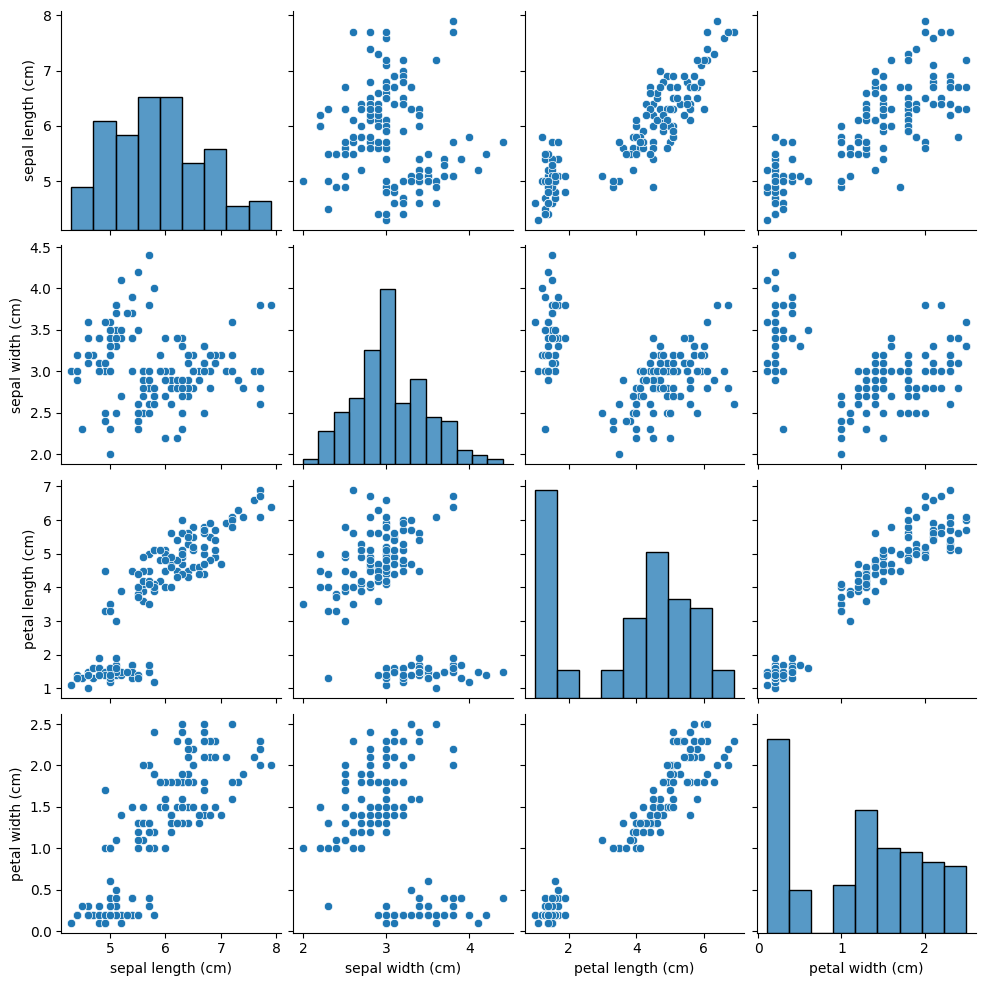

In [12]:
sns.pairplot(pd.DataFrame(X,columns=iris.feature_names))
plt.show()

### Sub-assignment: Short answer

In your own words, explain what the pair-plot above is showing us? What might we be able to infer about this data-sets ability to be used in supervised learning algorithms? Comment on possible interpretations of what is shown in the marginal distributions of the data, and the relationship between features.

`INSERT YOUR EXPLANATION HERE`


## Sub-assignment: compute distances

* Compute the following distance metrics for the data, store the distances in a vector, and visualize their distribution
* Do this FROM SCRATCH, i.e. implement the formulas yourself via loops.

More specifically, the code should do the following 

- Defines a function `compute_distance` to calculate various distance metrics between pairs of data points in a dataset `x`.
- Initializes empty lists to store distances: `dij_e` for Euclidean, `dij_cs` for Cosine Similarity, `dij_m` for Manhattan, and `dij_cd` for Cosine Distance.
- Iterates over each pair of data points in `x` to compute:
  - **Euclidean Distance**: Measures the straight-line distance between two points.
  - **Cosine Similarity**: Measures the cosine of the angle between two vectors.
  - **Manhattan Distance**: Measures the sum of absolute differences between coordinates.
  - **Cosine Distance**: Derived from cosine similarity as $1 - \text{Cosine Similarity}$
- Prints % of progress to completion every 10% of iterations. 
- Uses Seaborn to plot the distribution of each distance metric with a Kernel Density Estimate (KDE) overlay.
- Displays the plots with titles and axis labels for each distance metric.

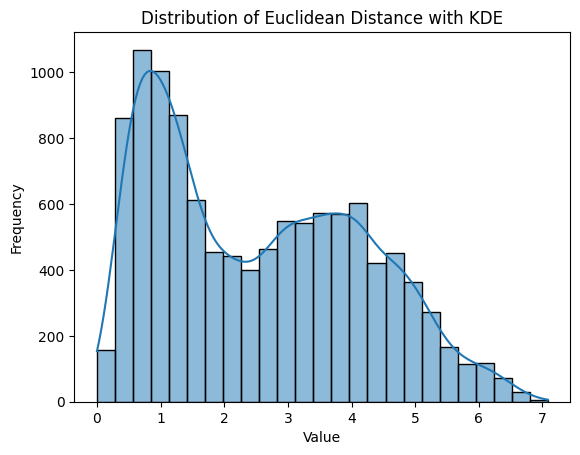

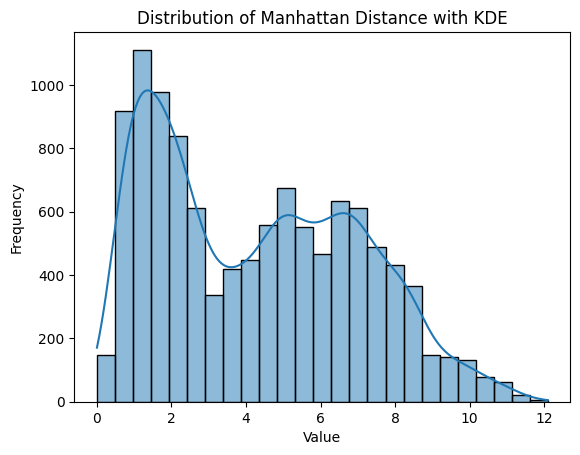

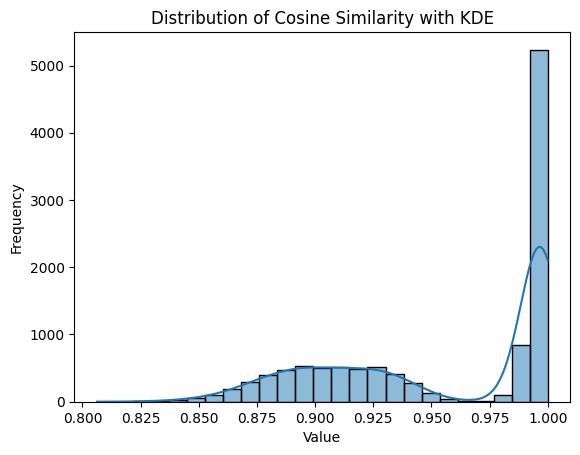

In [13]:
def compute_distance(x):
    # Calculate Euclidean distances between all pairs of data points
    euclidean_distances = pdist(x, metric='euclidean')
    
    # Plot the distribution of Euclidean distances with a KDE plot
    sns.histplot(euclidean_distances, bins=25, kde=True)
    plt.title('Distribution of Euclidean Distance with KDE')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

    # Calculate Manhattan distances between all pairs of data points
    manhattan_distances = pdist(x, metric='cityblock')
    
    # Plot the distribution of Manhattan distances with a KDE plot
    sns.histplot(manhattan_distances, bins=25, kde=True)
    plt.title('Distribution of Manhattan Distance with KDE')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

    # Calculate Cosine similarity between all pairs of data points
    cosine_similarity = 1 - pdist(x, metric='cosine')
    
    # Plot the distribution of Cosine similarity with a KDE plot
    sns.histplot(cosine_similarity, bins=25, kde=True)
    plt.title('Distribution of Cosine Similarity with KDE')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

compute_distance(X)


### Sub-assignment: Short answer

In your own words, explain what the distance distribution plots above are showing us? What might we be able to infer about this data-sets ability to be used in supervised learning algorithms? Is this consistent with what you described in the pair-plot above?

`These distance distribution plots (Euclidean distance, Manhattan distance, and cosine similarity) illustrate the distances or similarities between different samples in the Iris dataset. Most samples have shorter distances, indicating they are relatively close in the feature space. Additionally, the cosine similarity plot shows that most samples have highly similar direction vectors. These results suggest that the dataset is suitable for supervised learning algorithms, particularly for classification tasks, as the differences in distances and similarities between different classes can help the algorithms effectively distinguish them. This is consistent with the feature distribution patterns shown in the previous pair-plot.`

### Sub-assignment: t-SNE  

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a dimensionality reduction technique that visualizes high-dimensional data by mapping it to a lower dimensional space, commonly two or three dimensions.  preserving local structures and relationships, making it ideal for exploring complex datasets visually.

In the case below, we are mapping a 4 dimensional feature space to 2 dimensions.

For now, don't worry about how it works, we will talk about t-SNE more in the coming weeks, for now just run the code below to visualize the data.

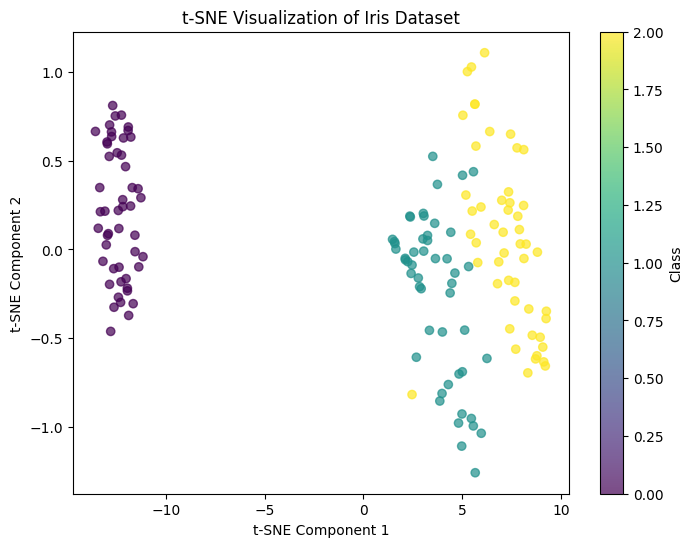

In [14]:

# Initialize t-SNE
tsne = TSNE(n_components=2, perplexity=50, random_state=42)

# Fit and transform the data
X_tsne = tsne.fit_transform(X)

# Plot the results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title('t-SNE Visualization of Iris Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, label='Class') 
plt.show()

### Sub-assignment: Short answer

In your own words, explain what the t-SNE plot above is showing us? What might we be able to infer about this data-sets ability to be used in supervised learning algorithms? Is this consistent with what you described in the pair-plot above?

`This t-SNE plot shows the clustering results of the Iris dataset after dimensionality reduction. The samples from the three categories are clearly separated, indicating significant differences between these categories, making the dataset suitable for classification tasks in supervised learning. This is consistent with the previous pair-plot, which also showed significant feature differences between samples from different categories.`

# Part-2: IMDB Text data


## Data

The IMDB dataset, often referred to in the context of sentiment analysis, is a collection of movie reviews from the Internet Movie Database (IMDB). Here's a brief description:

- **Size**: The dataset typically contains 50,000 reviews, split evenly into 25,000 for training and 25,000 for testing.
- **Content**: Each review is labeled as either positive or negative, making it a binary classification problem.
- **Format**: The dataset is usually provided in CSV format, with columns for the review text and the corresponding sentiment label.
- **Purpose**: It's commonly used for natural language processing tasks, particularly sentiment analysis, where the goal is to determine the sentiment expressed in the text (positive or negative).

This dataset is popular for benchmarking sentiment analysis models due to its size and the clear distinction between positive and negative reviews.

Notice that in this case we know the ground truth labels, generally this will not be true 

In [15]:
df=pd.read_csv("IMDB-Dataset.csv")
print(df.shape)
print(df.columns)

(50000, 2)
Index(['review', 'sentiment'], dtype='object')


In [16]:
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


## Sub-assignment: Clean up the text

- Imports and prints the list of English stopwords using the `nltk` library.
- Initializes empty lists `reviews` and `y` to store processed reviews and sentiment labels.
- Iterates over each review in the DataFrame `df`.
- Cleans the review text by:
  - Removing `<br />` tags and converting text to lowercase.
  - Replacing punctuation (`.,!;`) with spaces.
  - Keeping only specified characters (alphabetic, hyphen, apostrophe, and space).
  - Removing extra spaces.
- Removes stopwords from the cleaned text and appends the result to the `reviews` list.
- Converts sentiment labels to integers (`1` for "positive" and `0` for "negative") and appends them to the `y` list.
- Prints the original and cleaned review texts, along with sentiment labels, for the first four reviews.


In [17]:
# Define stop words set
stop_words = set(stopwords.words('english'))

# Print the list of stop words
print(stop_words)  

# Initialize CountVectorizer for text processing
vectorizer = CountVectorizer(stop_words=stop_words)

# Initialize lists to store processed reviews and sentiment labels
reviews = []
y = []

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    review = row['review']
    sentiment = row['sentiment']
    
    # Clean the text: remove HTML tags, convert to lowercase, remove punctuation and extra spaces
    review = review.replace("<br />", " ").lower()
    review = review.replace(",", " ").replace(".", " ").replace(";", " ").replace("!", " ")
    
    # Keep only allowed characters (letters, apostrophes, hyphens, and spaces)
    chars = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ '-"
    review = ''.join([char for char in review if char in chars])
    review = review.strip()
    
    # Remove stopwords
    review_words = review.split()
    filtered_review = ' '.join([word for word in review_words if word not in stop_words])
    
    # Append cleaned review to the list
    reviews.append(filtered_review)

    # Convert sentiment label to numeric (1 for positive, 0 for negative)
    if sentiment == 'positive':
        y.append(1)
    else:
        y.append(0)
    
    # Display processing progress every 10% of the total data
    if index % (len(df) // 10) == 0:
        print(f'percentage complete: {index / len(df) * 100:.1f}%')

# Print first 4 cleaned reviews and their corresponding sentiment labels
for i in range(4):
    print(reviews[i])
    print(f"sentiment: {y[i]}")

# Create a new DataFrame with the cleaned reviews and sentiment labels
updated_df = pd.DataFrame({
    'Review': reviews,
    'Sentiment': y
})

# Print the first 4 rows of the updated DataFrame
print(updated_df.head(4))

{'why', 'against', 'until', "you're", "mustn't", 'other', 'm', 'by', "shan't", "you've", 'then', 'y', "doesn't", 'that', 'hasn', "wouldn't", 'again', 'all', 'mustn', 'wasn', "don't", 'you', 'should', 'here', 'isn', 'have', "you'd", 'they', 'a', 'own', 'am', 'himself', 'is', 'too', "didn't", 'while', 'be', 'with', 'these', 'than', 'shouldn', 'the', "she's", 'now', 'between', 'this', 'his', 'but', 'any', 'themselves', "should've", "hasn't", 'having', 'below', 'in', 'aren', 'herself', 'out', 'mightn', 'yours', 'itself', 'before', "isn't", 'through', 'or', 'yourselves', 'shan', 'what', 'ma', 'and', 'both', 'very', 'it', "that'll", "wasn't", 'she', 'been', 'had', 'do', 'there', 'of', 'o', 'an', 'as', 'because', 'hadn', 'them', 'whom', "needn't", 'don', 'same', 'can', 'some', 'were', 'hers', 'into', 'few', 'over', "aren't", 'wouldn', 'weren', 'above', 'further', 'ours', 'each', 'which', 'i', 'once', 'about', 'haven', "couldn't", 'more', 'will', 'll', "mightn't", "weren't", 'does', 'up', 'ain

In [18]:
# CONVERT Y TO NUMPY ARRAY
y=np.array(y)

#DOUBLE CHECK SIZE
print(len(reviews),len(y))

50000 50000


## Sub-assignment: Vectorize the text


The code should do the following 

- Defines a function `vectorize` to transform a text corpus into a numerical format using `CountVectorizer`.
- Accepts a `corpus` (list of text documents) and `MAX_FEATURES` (maximum number of features to consider).
- Fits the vectorizer to the corpus and transforms it into a sparse matrix `Xs`.
- Converts the sparse matrix `Xs` to a dense NumPy array `X`.
- Normalizes `X` to one-hot vectors by dividing each element by the maximum value in its column.
- Returns the normalized matrix and the vocabulary generated by the vectorizer.
- Calls the `vectorize` function on the `reviews` list with `MAX_FEATURES` set to 10,000, storing the result in `x` and `vocab0`.


In [19]:
# INSERT CODE HERE 
def vectorize(corpus, MAX_FEATURES):
    vectorizer = CountVectorizer(max_features=MAX_FEATURES)
    
    Xs = vectorizer.fit_transform(corpus)
    
    X = Xs.toarray()
    
    X = X / X.max(axis=0)
    
    return X, vectorizer.get_feature_names_out()

x, vocab0 = vectorize(reviews, MAX_FEATURES=10000)

print(x.shape, y.shape)

(50000, 10000) (50000,)


In [20]:
# DOUBLE CHECK SHAPES
print(x.shape,y.shape)

(50000, 10000) (50000,)


## Sub-assignment: Distance distribution

* Down sample the data to 2000 samples
* Use the function `compute_distance` to compute the distance distribution
* Visualize the distance distribution


(2000, 10000)


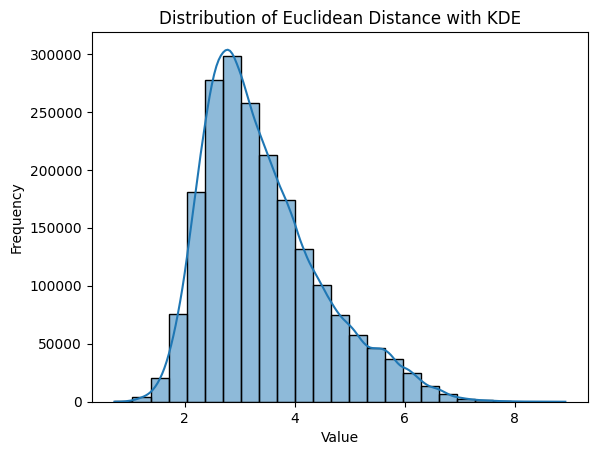

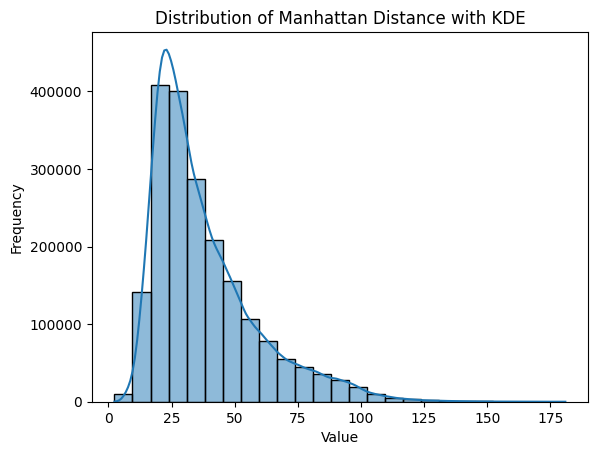

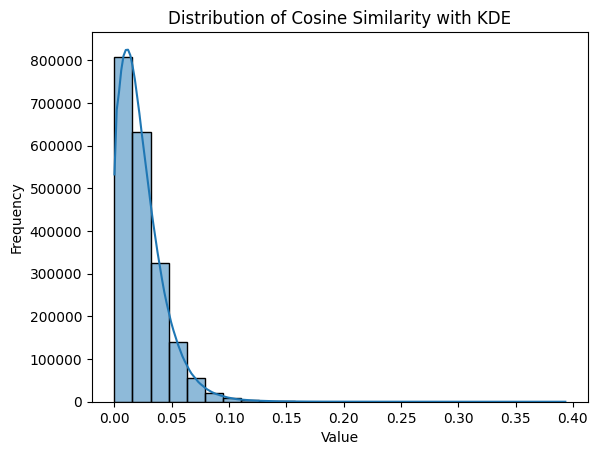

In [21]:

random_indices = np.random.choice(x.shape[0], size=2000, replace=False)

# Use the random indices to select rows from the array
x_subset = x[random_indices]
y_subset = y[random_indices]

print(x_subset.shape)

compute_distance(x_subset)

### Sub-assignment: Short answer

In your own words, explain what the distance distribution plots above are showing us? What might we be able to infer about this data-sets ability to be used in supervised learning algorithms? 

`These distance distribution charts illustrate the distances between samples in the dataset under different measurement methods. From this, it can be inferred that the distances between the samples are relatively concentrated, and the sample distributions vary under different distance measurement methods. This implies that the dataset can be effectively used for classification and clustering tasks in supervised learning. Especially when there is a certain similarity between samples (such as cosine similarity), it can improve the predictive performance of the model.`

### Sub-assignment: t-SNE  

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a dimensionality reduction technique that visualizes high-dimensional data by mapping it to a lower dimensional space, commonly two or three dimensions.  preserving local structures and relationships, making it ideal for exploring complex datasets visually.

In the case below, we are mapping a 4 dimensional feature space to 2 dimensions.

For now, don't worry about how it works, we will talk about t-SNE more in the coming weeks, for now just run the code below to visualize the data.

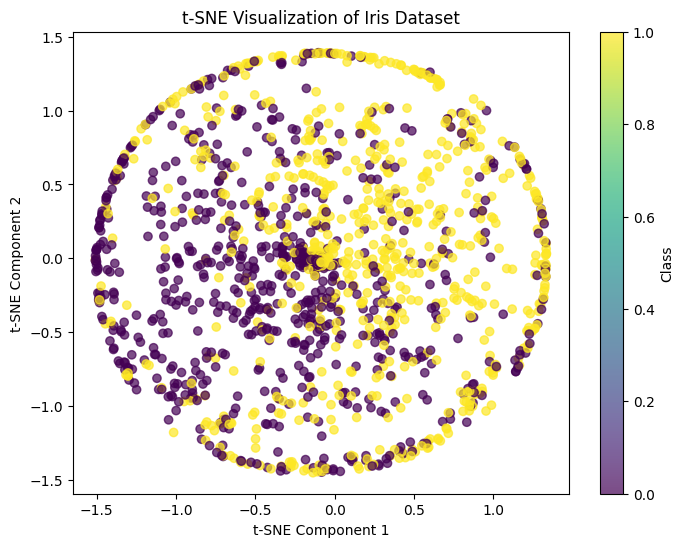

In [22]:

# Initialize t-SNE
tsne = TSNE(n_components=2, perplexity=1000, random_state=42)

# Fit and transform the data
X_tsne = tsne.fit_transform(x_subset)

# Plot the results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset, cmap='viridis', alpha=0.7)
plt.title('t-SNE Visualization of Iris Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, label='Class')
plt.show()

### Sub-assignment: Short answer

In your own words, explain what the t-SNE plot above is showing us? What might we be able to infer about this data-sets ability to be used in supervised learning algorithms? 

`This t-SNE chart shows the dimensionality reduction results of the original high-dimensional data (Iris dataset), mapping it into a 2-dimensional space. This helps us understand the distribution and relative positions of different categories in the dataset. Based on this chart, we can infer that the dataset is suitable for supervised learning algorithms, as the distribution between categories is relatively concentrated.`